<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>



<CENTER>
</br>
<p><font size="5"> TAF MCE - 2021</span></p>
<p><font size="4">  UE Machine Learning </font></p>
<p></p>
<p><font size="5">  Machine Learning Project </font></p>
<p><font size="2">   Supervised Machine Learning model to solve a binary classification problem </font></p>
</p></br>
</p>
</CENTER>

--------
Authors:

* KERDAD Fatima-Zahra
* ZRIAA Imane
* LEGUET Emmanuel
* ABDALLAOUI Nada

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import warnings
warnings.filterwarnings("ignore")
from src.utils import *
import argparse 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


Bad key "text.kerning_factor" on line 4 in
C:\Users\imane\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
models = dict(
            gauss={'model':GaussianNB, 'parameters':{}},
            kernel={'model':SVC,'parameters':{'kernel':['linear', 'rbf', 'sigmoid', 'poly'],'C':[1, 10], 
                                            'degree': [2, 3],'gamma' : ['scale', 'auto'] }},
            logisticregression={'model':LogisticRegression,'parameters':{'C':[1, 10],'fit_intercept' : [True,False],'intercept_scaling' : [1,10]}},
            knn={'model':KNeighborsClassifier, 'parameters':{'n_neighbors':[5,6,8,10,12,14,15]}}, 
            tree={'model':DecisionTreeClassifier, 'parameters':{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}},
            adaboost={'model':AdaBoostClassifier, 'parameters':{'learning_rate':[0.1,0.001],'n_estimators':[100,250]}},
            gradientboost={'model':GradientBoostingClassifier, 'parameters':{'max_depth':[5,10],'min_samples_leaf':[1],'n_estimators':[100]}},
            sgdclassifier={'model':SGDClassifier,'parameters':{'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],'penalty':['l1', 'l2'], 'fit_intercept' : [True,False]}},
                                            
)


# 1- Banknote Authentication Dataset

In [4]:
path_file = 'Data/BankNoteAuthentication.csv' # The path to our 1st dataset 

### 1- Loading and Preprocesing the data

In [5]:
#1step: Loading the data
data_frame=load_data(path_file)
#2step: Preprocessing the data
data_frame, num_col, cat_col, label_col = detect_type(data_frame)
data_frame = fill_na(data_frame, cat_col, num_col)

### 2- Visualization

#### Visualize  Numerical Features

###### Boxplots for Outliers detection

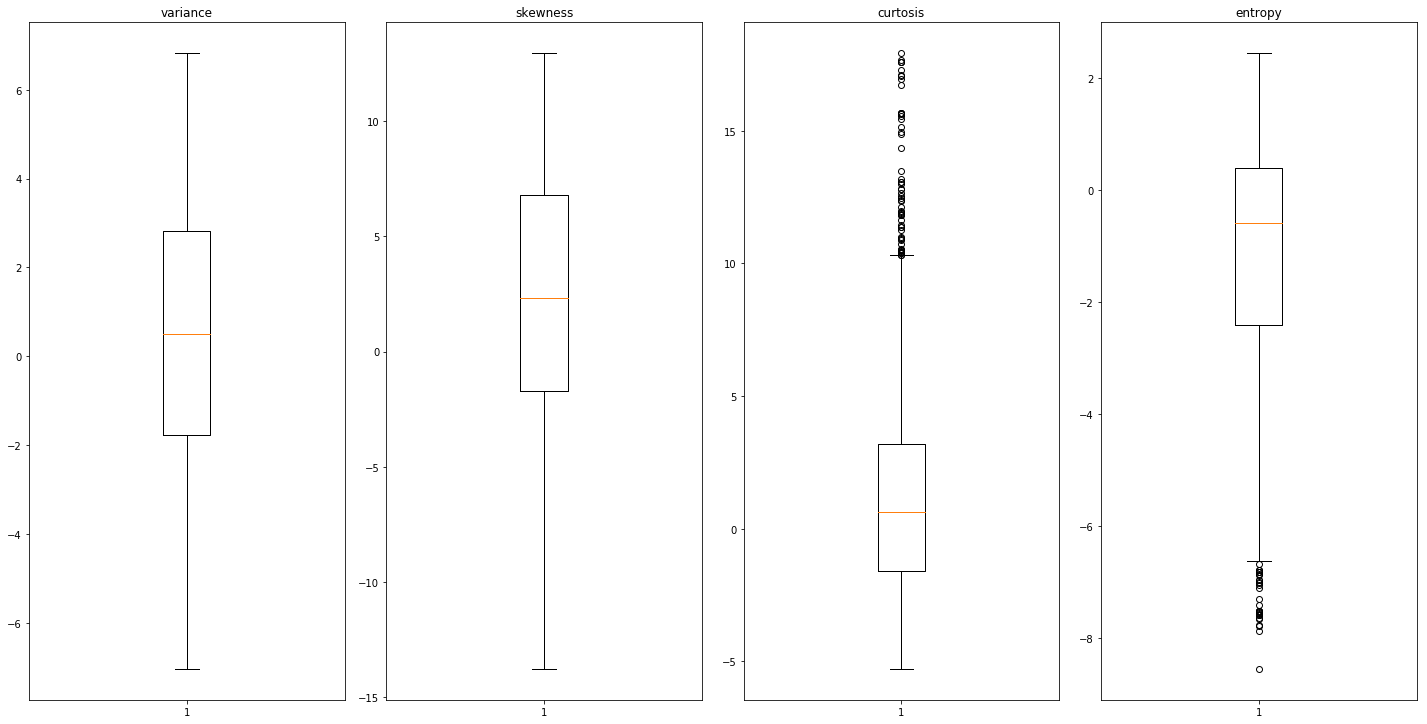

In [6]:
box_plot(data_frame)

######  Scatter Plot

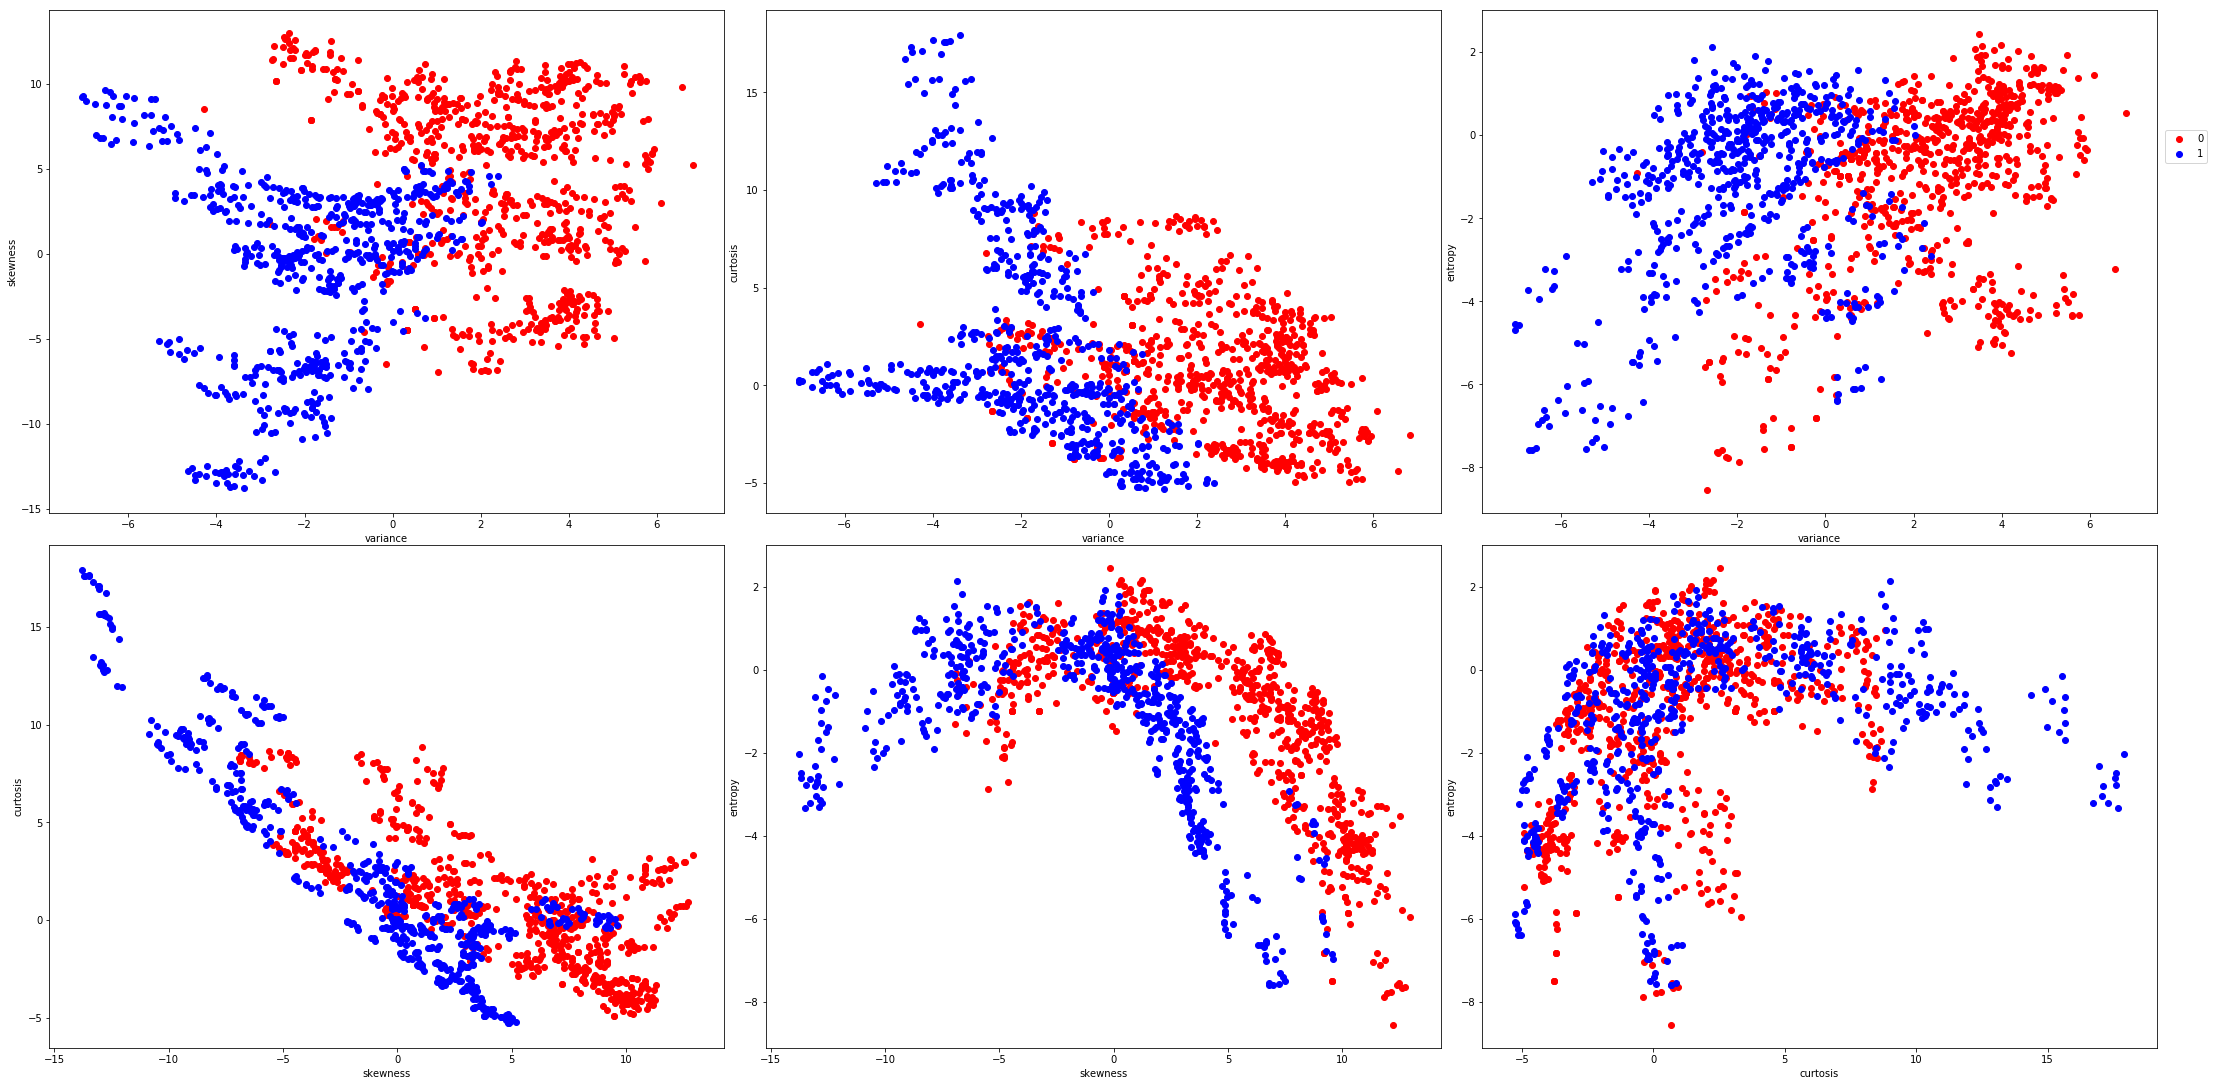

In [7]:
scatter_plot(data_frame)

### 3- Encoding the label and Categorical Features

In [8]:
data_frame_tr, label = transform_label(data_frame, label_col)
data_frame_tr = transform_data(data_frame_tr, cat_col, num_col)

### 4- Feature Selection

#### Correlation

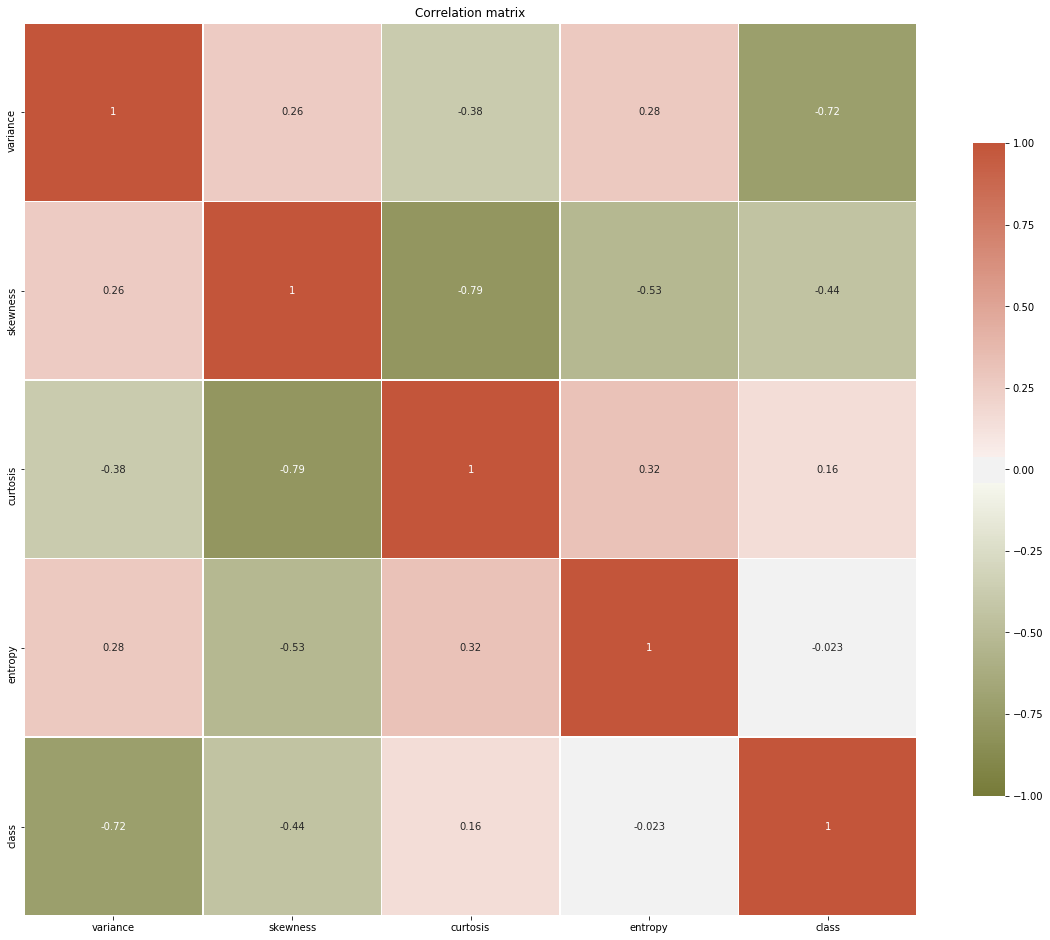

variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000

In [9]:
matrix_correlation_plot(data_frame)

#### PCA

In [10]:
reduced_data_frame = apply_pca(data_frame, explained_variance=0.9) #We keep features that explain 90% of the variance of our DataSet

No handles with labels found to put in legend.


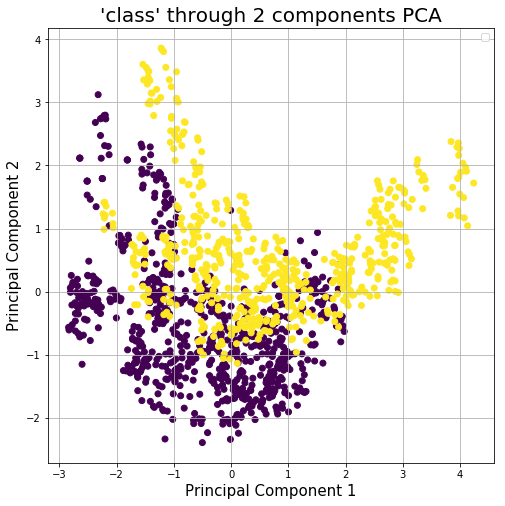

In [11]:
pca_vizualize_2d(df_clean=data_frame,df_transformed=data_frame_tr,col=label_col)

In [12]:
pca_plotly_3d(df_clean=data_frame,df_transformed=data_frame_tr,col=label_col)

### 5- Training the models

##### Start training

In [13]:
X_train, X_test, y_train, y_test =split_data(reduced_data_frame, label, 0.7) #Spliting the data into train and test

gscv = train_models(models, X_train, y_train, n_jobs=-1) # Cross validation with Grid Search to choose the best hyperparameters and then training the best models

Processing gauss model:   0%|          | 0/8 [00:00<?, ?it/s]

Parameters optimization & Estimator training:


Processing sgdclassifier model: 100%|██████████| 8/8 [02:27<00:00, 18.44s/it]     


In [14]:
display_train_results(gscv)



 Score results for best etimators:
|    | Model              |    Score | Parameters                                                         |
|---:|:-------------------|---------:|:-------------------------------------------------------------------|
|  1 | kernel             | 0.832148 | {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}           |
|  3 | knn                | 0.829738 | {'n_neighbors': 5}                                                 |
|  6 | gradientboost      | 0.827211 | {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}      |
|  4 | tree               | 0.812783 | {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}    |
|  5 | adaboost           | 0.807817 | {'learning_rate': 0.1, 'n_estimators': 250}                        |
|  2 | logisticregression | 0.756803 | {'C': 1, 'fit_intercept': True, 'intercept_scaling': 1}            |
|  7 | sgdclassifier      | 0.749456 | {'fit_intercept': True, 'loss': 'modified_huber', 'penalty':

### 6- Evaluating the models

##### Evaluate models

In [15]:
evaluations = evaluate_model(gscv, X_test, y_test)
for mod in evaluations.keys():
    print(f'{mod} :\n {evaluations[mod]}')

gauss :
 {'f1 score': 0.6970766180283694, 'accuracy': 0.7096774193548387, 'precision': 0.7297297297297297, 'recall': 0.5625}
kernel :
 {'f1 score': 0.8214494990638712, 'accuracy': 0.8241415192507804, 'precision': 0.8199513381995134, 'recall': 0.7800925925925926}
logisticregression :
 {'f1 score': 0.7173595288012156, 'accuracy': 0.7242455775234131, 'precision': 0.7203166226912929, 'recall': 0.6319444444444444}
knn :
 {'f1 score': 0.8250949486444052, 'accuracy': 0.8272632674297606, 'precision': 0.8151658767772512, 'recall': 0.7962962962962963}
tree :
 {'f1 score': 0.7943558855317971, 'accuracy': 0.7950052029136316, 'precision': 0.7473684210526316, 'recall': 0.8217592592592593}
adaboost :
 {'f1 score': 0.7827946520159257, 'accuracy': 0.7835587929240374, 'precision': 0.7372881355932204, 'recall': 0.8055555555555556}
gradientboost :
 {'f1 score': 0.8243204042381072, 'accuracy': 0.826222684703434, 'precision': 0.8088578088578089, 'recall': 0.8032407407407407}
sgdclassifier :
 {'f1 score': 0.

# 2- Chronic Kidney Disease

### 1- Loading and Preprocesing the data

In [16]:
path_file = 'Data/kidney_disease.csv'

### 2- Visualization

In [17]:
data_frame=load_data(path_file)
data_frame, num_col, cat_col, label_col = detect_type(data_frame)
data_frame = fill_na(data_frame, cat_col, num_col)

#### Visualize  Numerical Features

###### Boxplots for Outliers detection

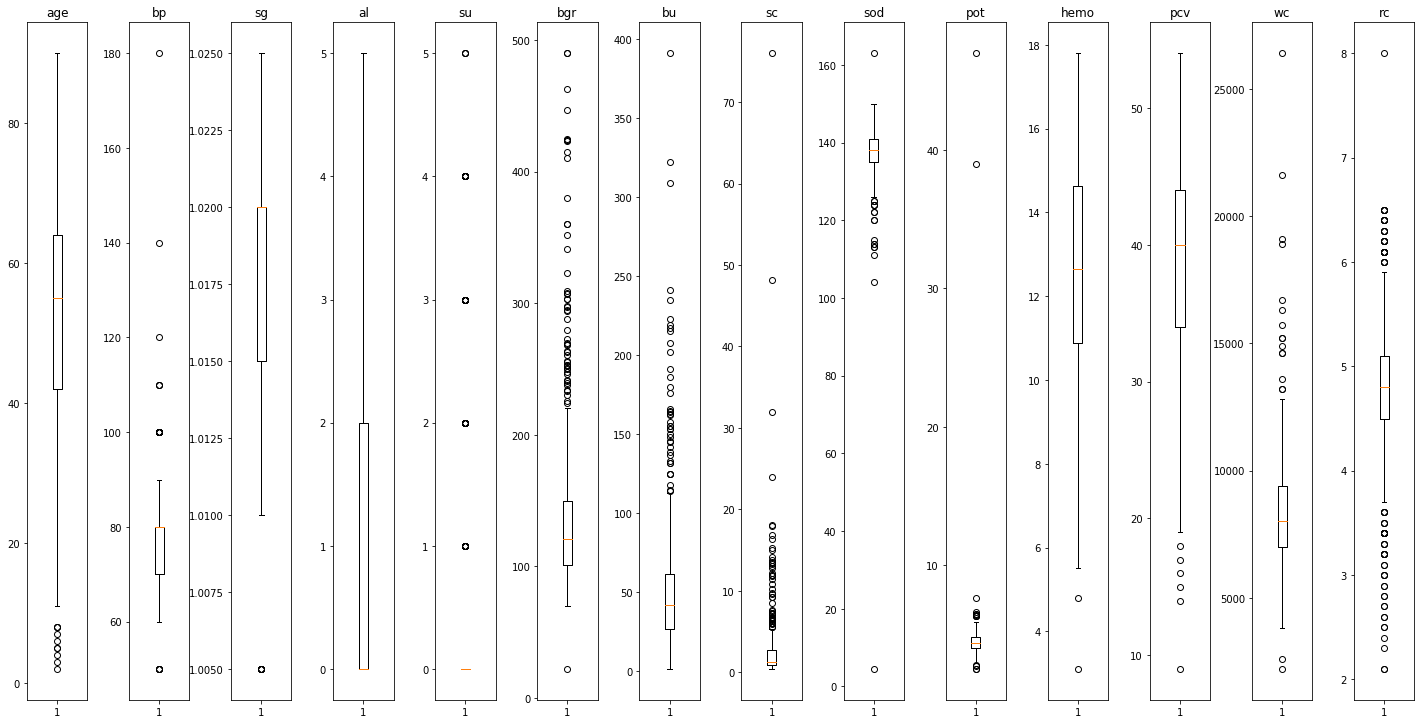

In [18]:
box_plot(data_frame) 

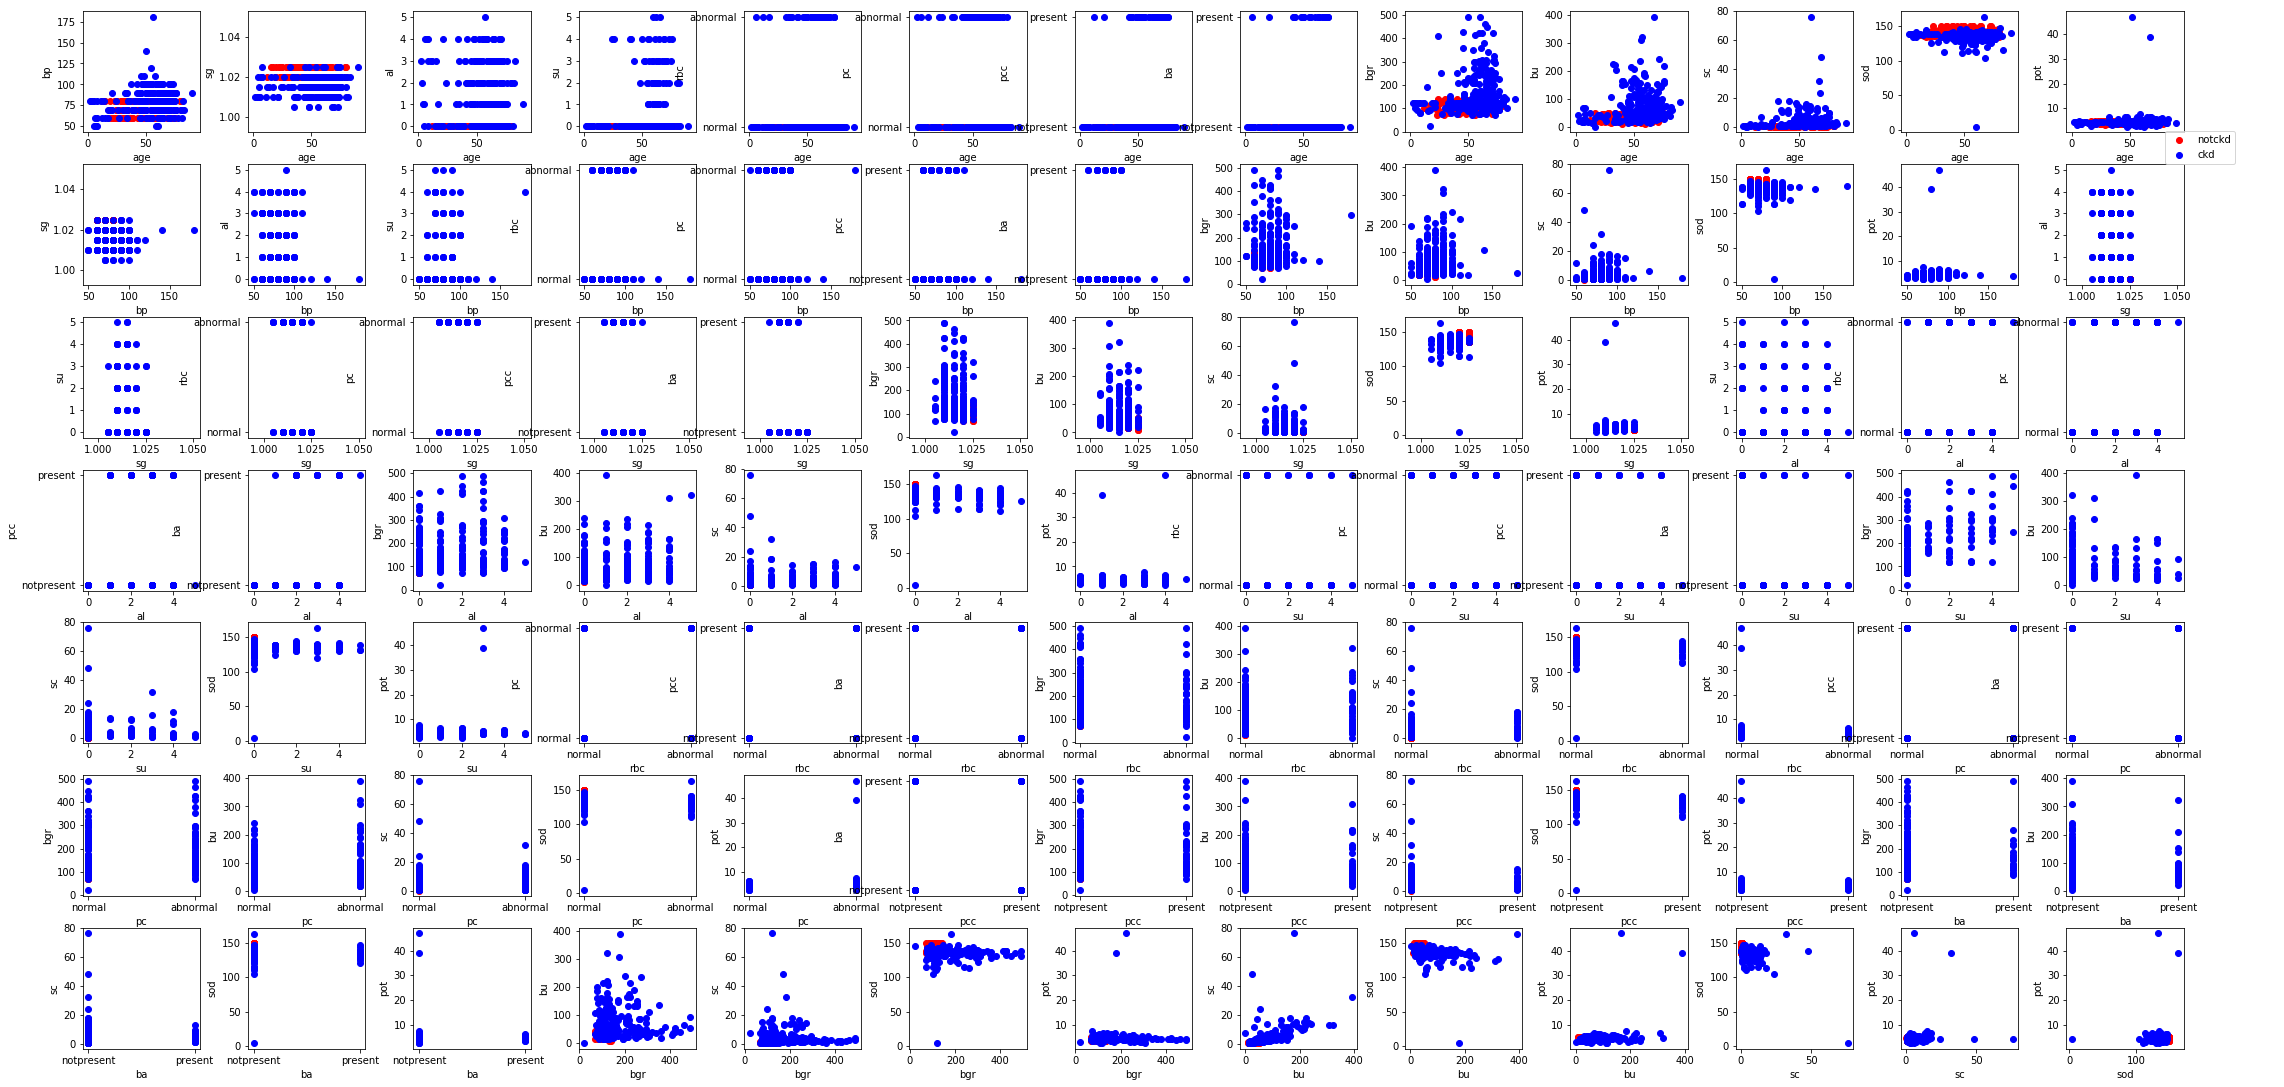

In [19]:
scatter_plot(data_frame)

#### Visualize  Categorical Features

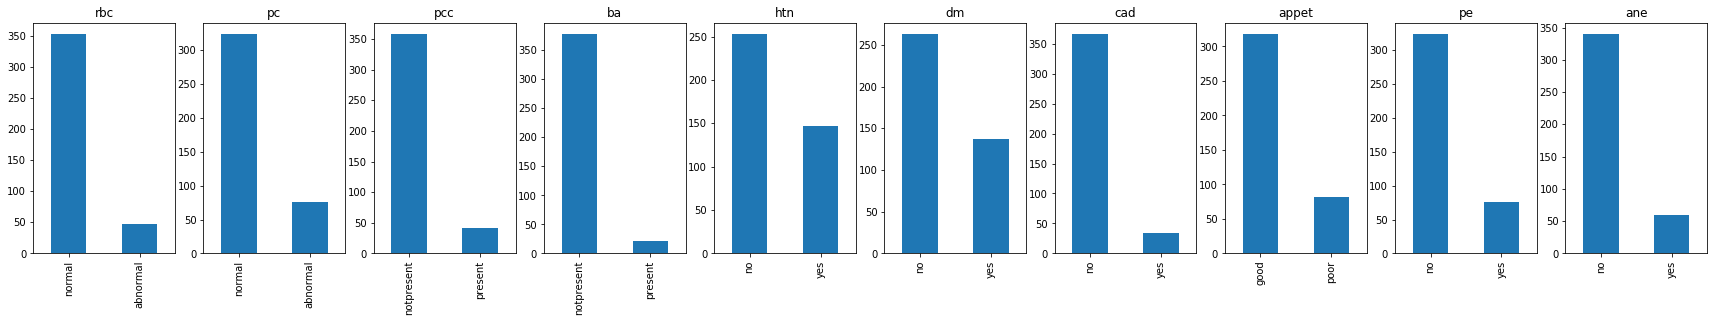

In [20]:
bar_plot(data_frame) 

### 3- Encoding the label and Categorical Features

In [21]:
data_frame_tr, label = transform_label(data_frame, label_col)
data_frame_tr = transform_data(data_frame_tr, cat_col, num_col)

### 4- Feature Selection

#### Correlation

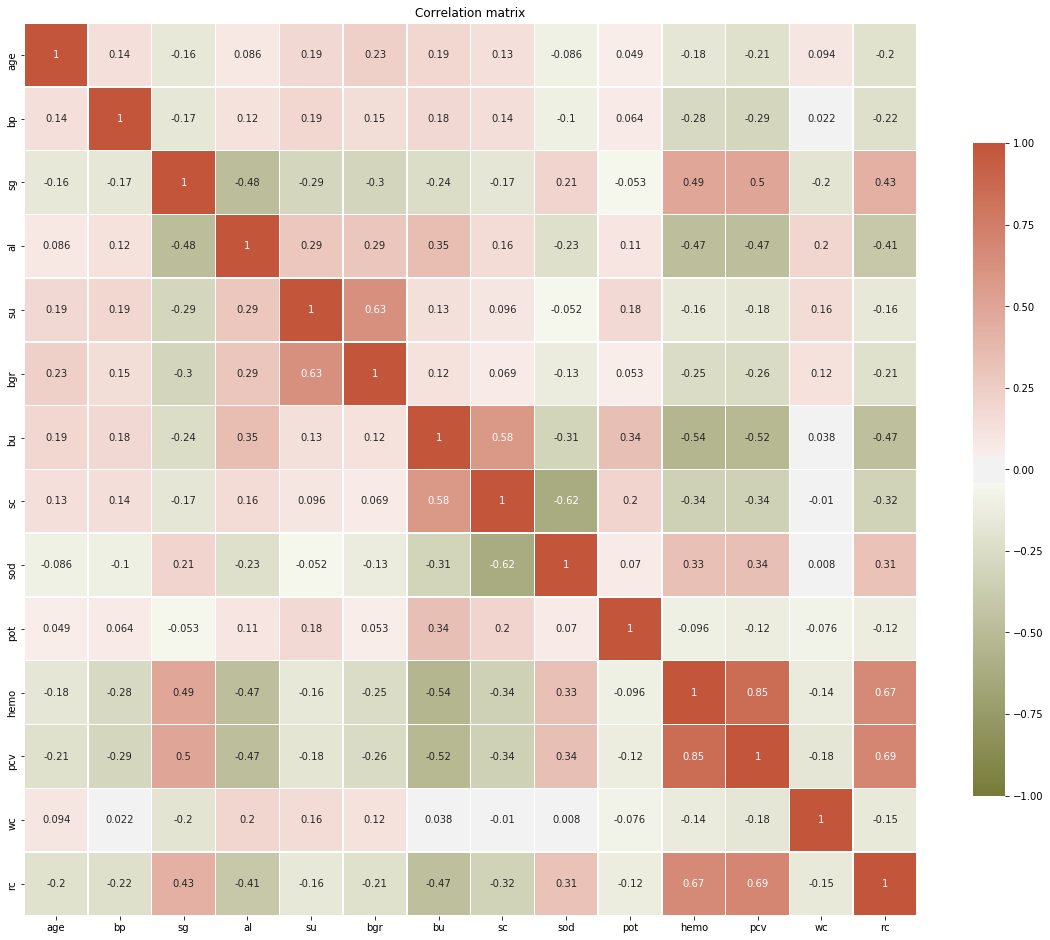

In [22]:
matrix_correlation_plot(data_frame);

#### PCA

No handles with labels found to put in legend.


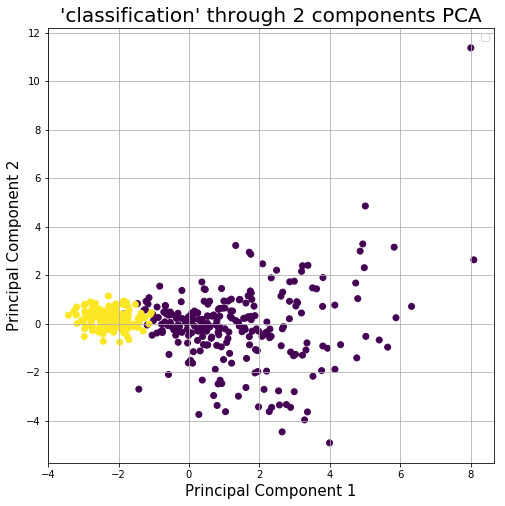

In [24]:
df2_cop_=data_frame_tr.copy()
df2_cop_['classification']=label.reshape(-1,1)
pca_vizualize_2d(df_clean=df2_cop_,df_transformed=data_frame_tr,col=label_col)

In [25]:
reduced_data_frame = apply_pca(df2_cop_, explained_variance=0.9)

In [26]:
pca_plotly_3d(df_clean=df2_cop_,df_transformed=data_frame_tr,col=label_col)

### 5- Training the models

##### Start training

In [27]:
X_train, X_test, y_train, y_test =split_data(reduced_data_frame, label, 0.7)
gscv = train_models(models, X_train, y_train, n_jobs=-1)

Processing kernel model:   0%|          | 0/8 [00:00<?, ?it/s]

Parameters optimization & Estimator training:


Processing sgdclassifier model: 100%|██████████| 8/8 [00:01<00:00,  4.38it/s]     


In [28]:
display_train_results(gscv)



 Score results for best etimators:
|    | Model              |    Score | Parameters                                                   |
|---:|:-------------------|---------:|:-------------------------------------------------------------|
|  1 | kernel             | 1        | {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}     |
|  0 | gauss              | 0.991667 | {}                                                           |
|  2 | logisticregression | 0.983333 | {'C': 10, 'fit_intercept': True, 'intercept_scaling': 1}     |
|  7 | sgdclassifier      | 0.983333 | {'fit_intercept': True, 'loss': 'hinge', 'penalty': 'l2'}    |
|  4 | tree               | 0.975    | {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1} |
|  5 | adaboost           | 0.975    | {'learning_rate': 0.1, 'n_estimators': 100}                  |
|  6 | gradientboost      | 0.975    | {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100} |
|  3 | knn                | 0.966667 | {'n_ne

### 6- Evaluating the models

In [29]:
evaluations = evaluate_model(gscv, X_test, y_test)
for mod in evaluations.keys():
    print(f'{mod} :\n {evaluations[mod]}')

gauss :
 {'f1 score': 0.9623169681309216, 'accuracy': 0.9642857142857143, 'precision': 0.9196428571428571, 'recall': 0.9903846153846154}
kernel :
 {'f1 score': 0.9735760026963263, 'accuracy': 0.975, 'precision': 0.9369369369369369, 'recall': 1.0}
logisticregression :
 {'f1 score': 0.9773107881800012, 'accuracy': 0.9785714285714285, 'precision': 0.9454545454545454, 'recall': 1.0}
knn :
 {'f1 score': 0.9587568124907939, 'accuracy': 0.9607142857142857, 'precision': 0.9043478260869565, 'recall': 1.0}
tree :
 {'f1 score': 0.9848189112990675, 'accuracy': 0.9857142857142858, 'precision': 0.9629629629629629, 'recall': 1.0}
adaboost :
 {'f1 score': 0.9848189112990675, 'accuracy': 0.9857142857142858, 'precision': 0.9629629629629629, 'recall': 1.0}
gradientboost :
 {'f1 score': 0.9848189112990675, 'accuracy': 0.9857142857142858, 'precision': 0.9629629629629629, 'recall': 1.0}
sgdclassifier :
 {'f1 score': 0.996168110467901, 'accuracy': 0.9964285714285714, 'precision': 1.0, 'recall': 0.99038461538